# Techniques vues en TP:

## 1) Reduction de dimension

### - Principal Component Analysis (PCA)

-> Quantitatif

-> Non supervisé

-> Maximiser la variance globale

### - Linear Discriminant Analysis (LDA)

-> Quantitatif

-> Supervisé

-> Maximiser la séparation entre classes (La LDA sert aussi pour la classification)

### - Correspondent Analysis (CA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre deux variables

### - Multiple Correspondent Analysis (MCA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre plusieurs variables

### - Multiple Factorial Analysis (MFA)

-> Quantitatif + Qualitatif 

-> Non supervisé

-> Sert analyser l'effet de groupes (blocs) sur les individus

## 2) Reduction de dimension non linéaire

### - Kernel Principal Component Analysis (KPCA)

### - Non-negative matrix factorization (NMF)

### - Multidimensional scaling (MDS)

## 3) Clustering

### - K-means

### - Hierarchical Agglomerative Clustering (HAC)

### - Gaussian Mixture Models (GMM)

### - Stochastic Bloc Model (SBM)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
marketing = pd.read_csv('marketing_campaign.csv',sep="\t")

In [5]:
marketing.head()
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [7]:
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

In [8]:
#On va faire quelques plots hehehehe

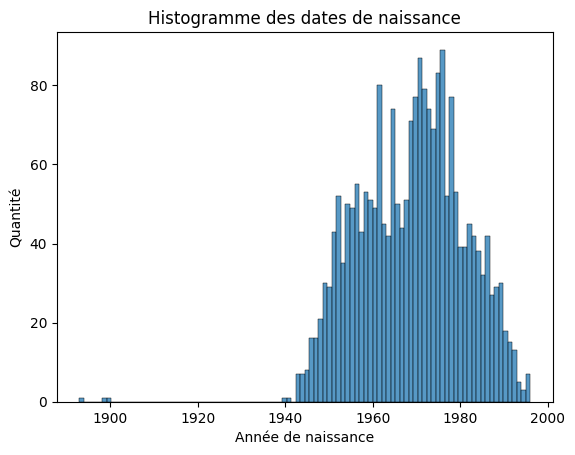

In [9]:
sns.histplot(marketing['Year_Birth'], bins = 100)
plt.title("Histogramme des dates de naissance")
plt.xlabel("Année de naissance")
plt.ylabel("Quantité")
plt.show()

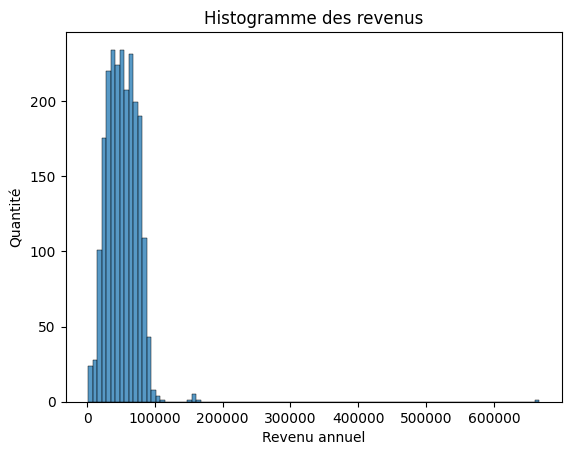

In [10]:
sns.histplot(marketing['Income'], bins = 100)
plt.title("Histogramme des revenus")
plt.xlabel("Revenu annuel")
plt.ylabel("Quantité")
plt.show()

In [11]:
riche = marketing.loc[marketing['Income']>600000, 'ID']
print(riche)

2233    9432
Name: ID, dtype: int64


In [12]:
marketing = marketing.drop(marketing[marketing['ID']==9432].index)

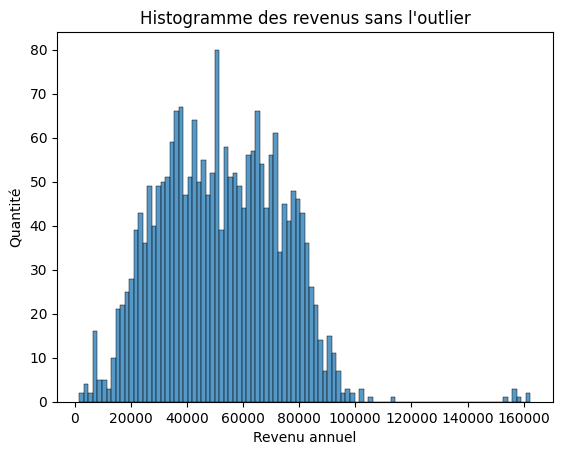

In [13]:
sns.histplot(marketing['Income'], bins = 100)
plt.title("Histogramme des revenus sans l'outlier")
plt.xlabel("Revenu annuel")
plt.ylabel("Quantité")
plt.show()

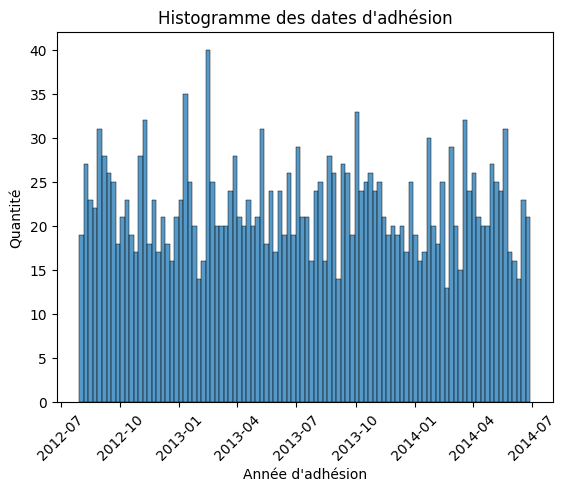

In [14]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y')
sns.histplot(marketing['Dt_Customer'], bins = 100)
plt.title("Histogramme des dates d'adhésion")
plt.xlabel("Année d'adhésion")
plt.ylabel("Quantité")
plt.xticks(rotation=45)
plt.show()

In [15]:
# on tente une première classification

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
marketing_numerique = marketing.select_dtypes(include=[np.number])

In [18]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Income               2239 non-null   float64
 3   Kidhome              2239 non-null   int64  
 4   Teenhome             2239 non-null   int64  
 5   Recency              2239 non-null   int64  
 6   MntWines             2239 non-null   int64  
 7   MntFruits            2239 non-null   int64  
 8   MntMeatProducts      2239 non-null   int64  
 9   MntFishProducts      2239 non-null   int64  
 10  MntSweetProducts     2239 non-null   int64  
 11  MntGoldProds         2239 non-null   int64  
 12  NumDealsPurchases    2239 non-null   int64  
 13  NumWebPurchases      2239 non-null   int64  
 14  NumCatalogPurchases  2239 non-null   int64  
 15  NumStorePurchases    2239 non-null   int64 

In [19]:
marketing_numerique = marketing_numerique.drop('AcceptedCmp1',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp2',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp3',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp4',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp5',axis=1)
marketing_numerique = marketing_numerique.drop('Complain',axis=1)
marketing_numerique = marketing_numerique.drop('Response',axis=1)
marketing_numerique = marketing_numerique.drop('ID',axis=1)

In [20]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2239 non-null   int64  
 1   Income               2239 non-null   float64
 2   Kidhome              2239 non-null   int64  
 3   Teenhome             2239 non-null   int64  
 4   Recency              2239 non-null   int64  
 5   MntWines             2239 non-null   int64  
 6   MntFruits            2239 non-null   int64  
 7   MntMeatProducts      2239 non-null   int64  
 8   MntFishProducts      2239 non-null   int64  
 9   MntSweetProducts     2239 non-null   int64  
 10  MntGoldProds         2239 non-null   int64  
 11  NumDealsPurchases    2239 non-null   int64  
 12  NumWebPurchases      2239 non-null   int64  
 13  NumCatalogPurchases  2239 non-null   int64  
 14  NumStorePurchases    2239 non-null   int64  
 15  NumWebVisitsMonth    2239 non-null   int64 

In [21]:
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(marketing_numerique)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395 0.02918183 0.02855826 0.02622311 0.02430991
 0.02190541 0.01583159 0.01423146 0.0105567 ]


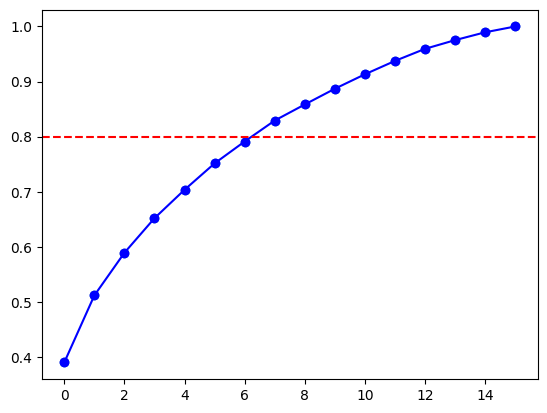

In [22]:
pca = PCA()
marketing_pca = pca.fit_transform(marketing_scaled)
print(pca.explained_variance_ratio_)
plt.scatter(np.arange(16),np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(16),np.cumsum(pca.explained_variance_ratio_), color='blue', linestyle='-', marker='o')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.show()

In [23]:
pca = PCA(0.8)
marketing_pca = pca.fit_transform(marketing_scaled)
print(pca.explained_variance_ratio_)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395]


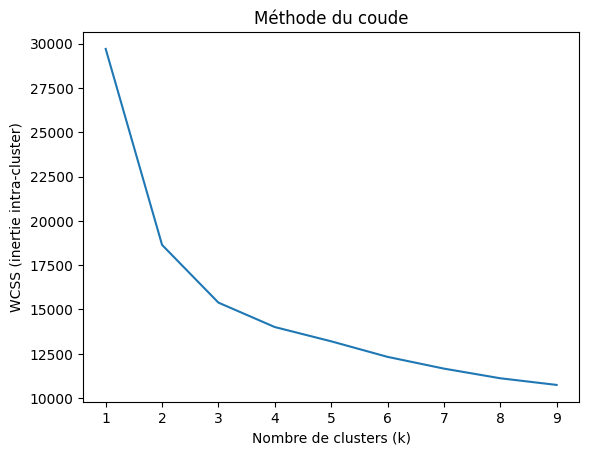

In [24]:
wcss = []  # Inertie intra-cluster

# Tester pour différents k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_pca)
    wcss.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 10), wcss)
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS (inertie intra-cluster)")
plt.show()

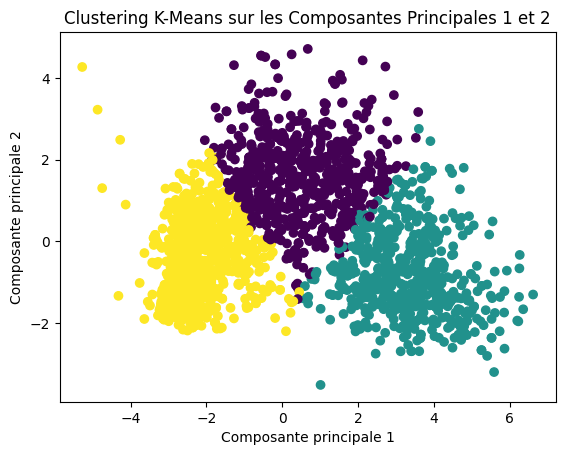

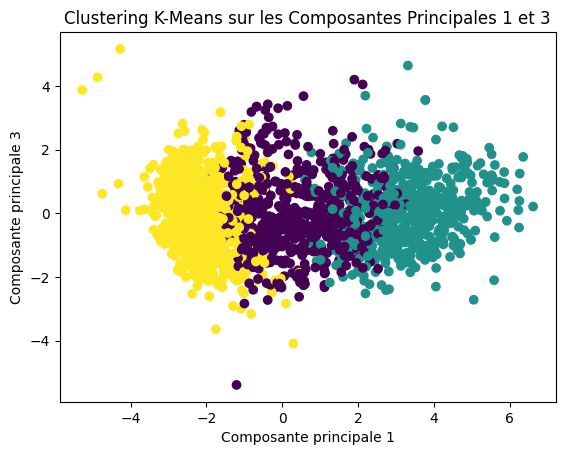

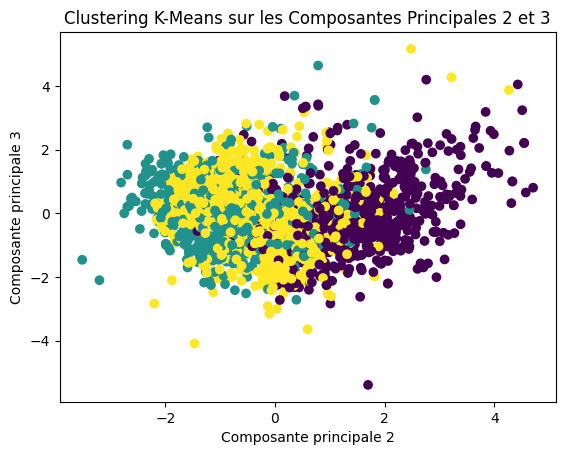

In [27]:
# Appliquer K-Means sur les composantes principales
kmeans = KMeans(n_clusters=3, random_state=42)  # Choisir le nombre de clusters (ici 3)
clusters = kmeans.fit_predict(marketing_pca)  # Effectuer le clustering

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 2")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 3")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 3")
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 2 et 3")
plt.xlabel("Composante principale 2")
plt.ylabel("Composante principale 3")
plt.show()